# WEEK 6 DATA ANALYTICS ASSIGNMENT SOLUTION

## 1. LOAD DATA

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load in the data file
df= pd.read_csv (r"C:\Users\user\OneDrive\Desktop\food_order.csv")

## 2. EXPLORE THE DATAFRAME

In [3]:
# Take a look at the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [5]:
# take a look at the columns
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [6]:
# assess the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [7]:
# Check the summary statistics of the numerical values
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## 3. DATA CLEANING

In [8]:
# Look for duplicates
df[df.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [9]:
#no duplicates found


In [10]:
#look for missing values or null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [11]:
# no null values 

'rating' should be included in the summary statistics. let's check what has happened

In [12]:
#check for unique values for the rating column 
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [13]:
#delete the rows that have 'not given' in the rating column
df.drop(df.index[df['rating']=='Not given'], inplace= True)

In [14]:
# CONVERT THE RATING COLUMN INTO INTEGER DATA TYPE
df['rating']=df['rating'].astype('int64')

In [15]:
#check the summary statistics again
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.162000e+03,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,1.477520e+06,171939.471601,16.760766,4.344234,27.381239,24.154045
std,5.468713e+02,114551.215031,7.572578,0.741478,4.677922,4.930999
min,1.476547e+06,5139.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477062e+06,77540.000000,12.130000,4.000000,23.000000,20.000000
50%,1.477524e+06,128655.500000,14.600000,5.000000,27.000000,25.000000
75%,1.477992e+06,276066.250000,22.750000,5.000000,32.000000,28.000000
max,1.478444e+06,403019.000000,35.410000,5.000000,35.000000,33.000000


The Dataset has been cleaned

## 4. SOLUTION TO THE BUSINESS QUESTIONS

_Q1: What is the average cost of orders in the dataset?_

In [16]:
# Find the mean of the 'cost of order'
df['cost_of_the_order']. mean()

16.76076592082616

__The average cost of orders is $16.76__


_Q2: Which restaurant has the highest average cost per order?_

In [17]:
# USE GROUPBY() TO GROUP THE RESTURSNT NAME, MEAN TO FIND THE AVERAGE COST PER ORDER AND SORT BY() TO SORT IT
highest= df.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending= False)

In [18]:
#return only the first result
highest.head(1)

restaurant_name
Kambi Ramen House    32.93
Name: cost_of_the_order, dtype: float64

__Kambi Ramen House has the highest average cost per order__

_Q3: What is the distribution of cuisine types in the dataset?_

In [19]:
#CREATE LIST OF CUISINE TYPES
cuisines= df['cuisine_type'].unique()

#create the counts of the cuisine types
cuisine_counts=df['cuisine_type'].value_counts()

Text(0, 0.5, 'cuisine counts')

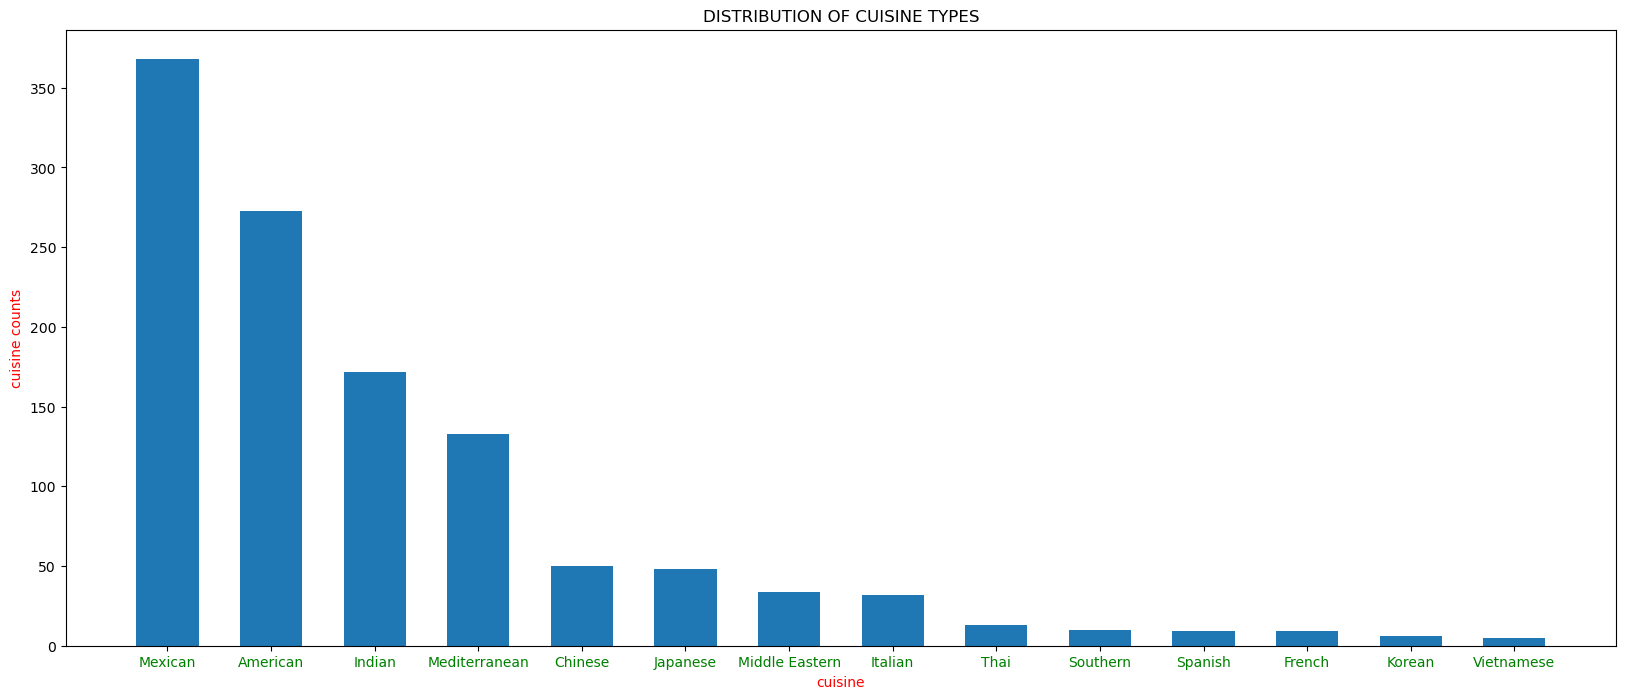

In [20]:
#create a bar chart with cuisine on the x axis and the count on y axis showing the distribution of the various cuisine types
plt.figure(figsize=(20,8))
plt.bar(cuisines,cuisine_counts,width=0.6,align='center')
plt.xticks(color='green')
plt.title('DISTRIBUTION OF CUISINE TYPES')
plt.xlabel('cuisine',color='red')
plt.ylabel('cuisine counts',color='red')

_Q4: Are orders more frequently placed on weekdays or weekends?_

In [40]:
#count the days of the week
count_day=df['day_of_the_week'].value_counts()



In [71]:
print(count_day)

day_of_the_week
Weekend    822
Weekday    340
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x24aa924a4d0>,
 [Text(-0.8746462262624144, -0.6670786901744933, 'Weekend'),
  Text(0.8746462262624144, 0.6670786901744932, 'Weekday')],
 [Text(-0.4770797597794987, -0.3638611037315418, '70.7%'),
  Text(0.4770797597794987, 0.36386110373154174, '29.3%')])

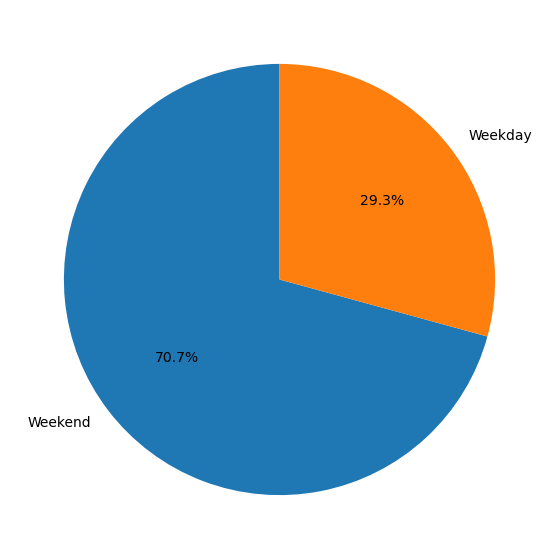

In [42]:
#create a piechart to visualise the info above
plt.figure(figsize=(7,7))
plt.pie(count_day,labels= count_day.index,autopct='%1.1f%%',startangle=90)

__Orders are placed more on weekends__

_Q5: What restaurants have an average rating of 5?_

In [44]:
#Group by restaurants and find the average rating
rest_rating=df.groupby('restaurant_name')['rating'].mean().sort_values(ascending= False)

#Return the restaurants with average rating of 5
high_rated= rest_rating[rest_rating== 5]

print(high_rated)

restaurant_name
'wichcraft                       5.0
Ravagh Persian Grill             5.0
Chola Eclectic Indian Cuisine    5.0
Chote Nawab                      5.0
Junoon                           5.0
Socarrat Paella Bar              5.0
DespaÌ±a                         5.0
Dig Inn Seasonal Market          5.0
Saravanaa Bhavan                 5.0
Donburi-ya                       5.0
Dos Caminos                      5.0
Dos Caminos Soho                 5.0
Samurai Mama                     5.0
El Parador Cafe                  5.0
Prosperity Dumpling              5.0
Carmine's                        5.0
Galli Restaurant                 5.0
Grand Sichuan International      5.0
Philippe Chow                    5.0
Olive Garden                     5.0
Haru Gramercy Park               5.0
Moonstruck on Second             5.0
Mission Cantina                  5.0
Hot Kitchen                      5.0
Hunan Manor                      5.0
Lantern Thai Kitchen             5.0
Klong                 

_Q6:Which cuisine type has the highest average rating?_

In [46]:
# Group by cuisine types and find the average ratings and sort by highest rating
cuisine_rating=df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

#return cuisine type with highest rating
cuisine_rating.head(1)

cuisine_type
Spanish    4.833333
Name: rating, dtype: float64

__Spanish cuisine has the highest average rating__

 _Q7:How does the distribution of food preparation times look across different cuisine types?_

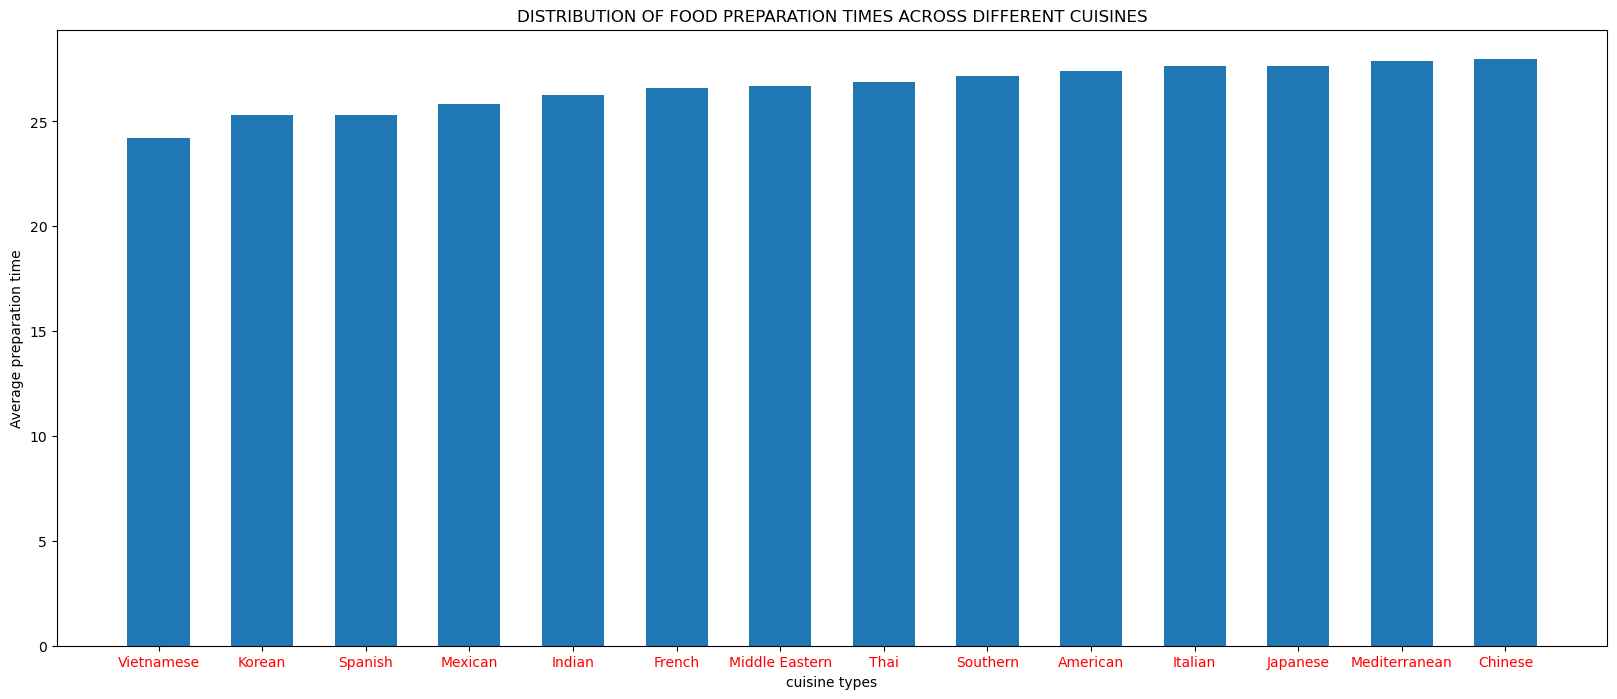

In [54]:
# find the mean preparation times for each cuisine
prep_time=df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values()

#plot a bar chart to show this distribution
plt.figure(figsize=(20,8))
plt.bar(prep_time.index,prep_time,width=0.6,align='center')
plt.xticks(color='red')
plt.title('DISTRIBUTION OF FOOD PREPARATION TIMES ACROSS DIFFERENT CUISINES')
plt.xlabel('cuisine types',color='black')
plt.ylabel('Average preparation time',color='black')
plt.show()

_Q8:What is the average delivery time for orders placed on weekends versus weekdays?_

In [76]:
#Group by day_of_the_week, find the average delivery time
avg_delivery_time=df.groupby('day_of_the_week')['delivery_time'].mean().sort_values()

#view the results
print(avg_delivery_time)

day_of_the_week
Weekend    22.436740
Weekday    28.305882
Name: delivery_time, dtype: float64


__Weekend average delivery time is 22.44 mins while Weekday average delivery time is 28.31 mins__

_Q9:How does the rating vary for different cuisine types?_

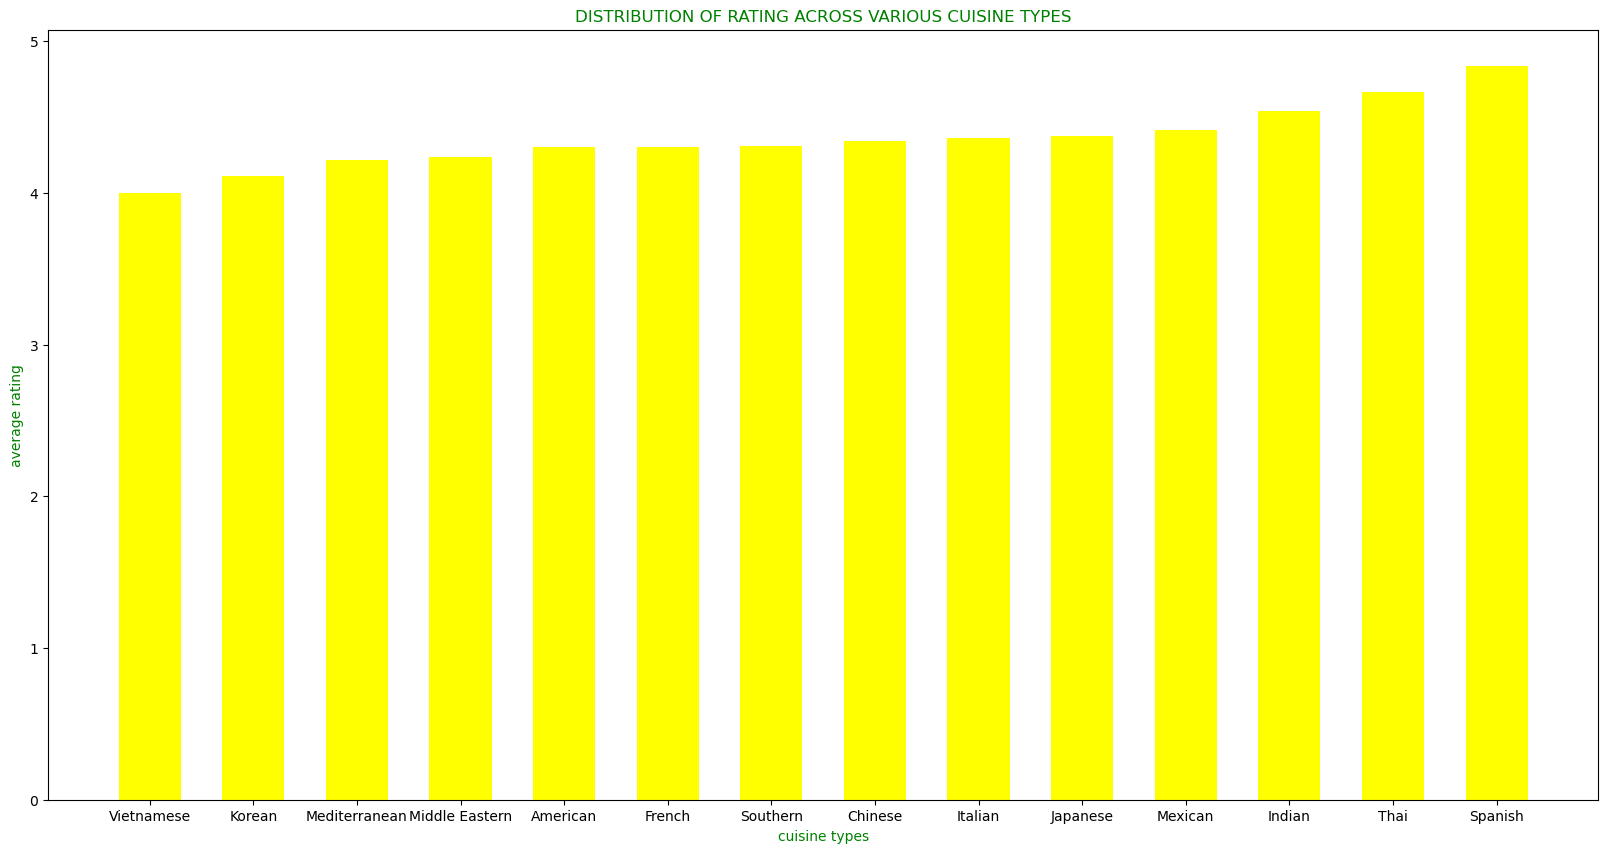

In [70]:
# Group by cuisine types and find the average rating
rating=df.groupby('cuisine_type')['rating'].mean().sort_values(ascending= True)

#plot a bar chart to show this distribution
plt.figure(figsize=(20,10))
plt.bar(rating.index,rating,width=0.6,align='center',color='yellow')
plt.title('DISTRIBUTION OF RATING ACROSS VARIOUS CUISINE TYPES',color='green')
plt.xticks(color='black')
plt.xlabel('cuisine types',color='green')
plt.ylabel('average rating',color='green')
plt.show()

_Q10: Can we identify any trends in food preparation times and delivery times over the dataset's timeline?_

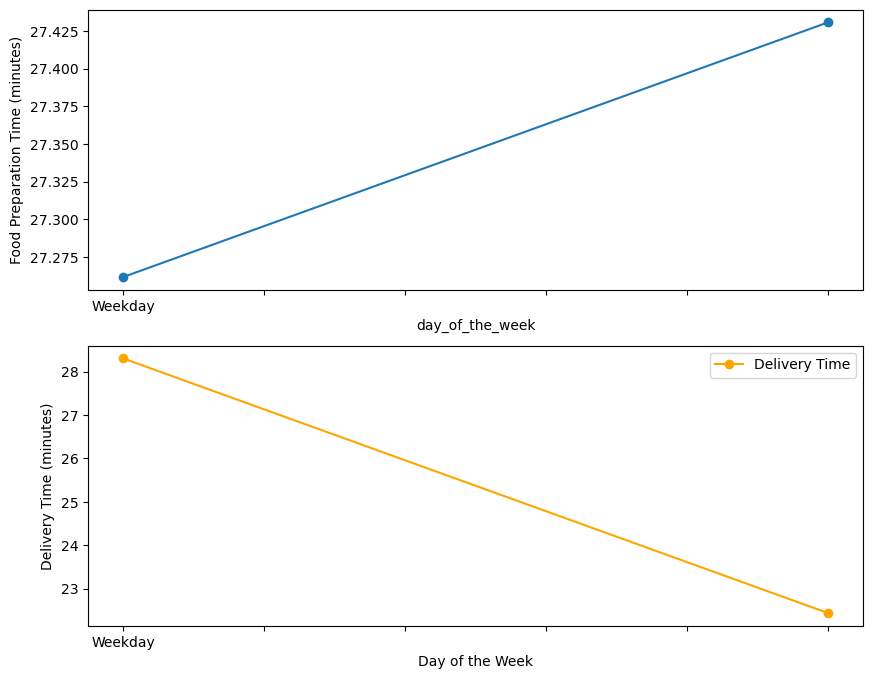

In [75]:
# Plotting average food preparation time and delivery time per day of the week
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

df.groupby('day_of_the_week')['food_preparation_time'].mean().plot(ax=ax1, marker='o', label='Food Preparation Time')
df.groupby('day_of_the_week')['delivery_time'].mean().plot(ax=ax2, marker='o', color='orange', label='Delivery Time')

ax1.set_ylabel('Food Preparation Time (minutes)')
ax2.set_ylabel('Delivery Time (minutes)')
plt.xlabel('Day of the Week')
plt.legend()
plt.show()

__In the above, there is a noticeable trend in the food preparation and delivery times during the days of the week. The average time for preparation of food per day increases during the week while the average delivery time per day decreases during the week__

## 4. CONCLUSIONS AND RECOMMENDATIONS

**Summarized Insights from the "food_order" Dataset Exploration:**

1. **Cost Dynamics:**
   - The average cost of orders stands at *$16.76*, offering a fundamental insight into the financial aspect of customer transactions.

2. **Distinct Restaurant Offering:**
   - Kambi Ramen House holds the distinction of having the highest average cost per order at $32.93, suggesting a unique market position or specialty. Further investigation into menu preferences is recommended to discern contributing factors.

3. **Culinary Diversity:**
   - Visualizing cuisine types through a bar chart highlights the dataset's culinary diversity. This insight serves as a valuable reference for both customers seeking diverse options and restaurant owners assessing the popularity of specific culinary styles.

4. **Weekend Ordering Trend:**
   - A significant trend reveals that 70.7% of orders are placed on weekends. This observation has operational implications, indicating the need for optimized staffing and resources during peak weekend periods.

5. **Top-Rated Establishments:**
   - Several restaurants boast an average rating of 5, showcasing exceptional customer satisfaction. This distinction not only serves as a reference for customers seeking outstanding experiences but also provides marketing opportunities for highlighted establishments.

6. **Highly Rated Cuisine:**
   - Spanish cuisine leads with the highest average rating of 4.83. This insight can influence promotional strategies and guide marketing efforts to capitalize on the positive reception of Spanish culinary offerings.

7. **Operational Insights - Food Preparation Times:**
   - Examination of food preparation times across different cuisine types unveils variations, offering valuable operational insights. Cuisine-specific preparation time trends can inform kitchen management strategies, enhancing efficiency.

8. **Delivery Time Optimization:**
   - Analyzing average delivery times on weekdays versus weekends recommends practical strategies for restaurant owners. Leveraging shorter weekend delivery times (22.44 minutes) can enhance service quality during peak delivery periods.

9. **Cuisine-Specific Rating Variations:**
   - The variation in ratings across different cuisine types emphasizes the importance of understanding customer preferences. This insight guides menu development, allowing restaurants to focus on cuisines aligning with customer tastes.

**Actionable Recommendations for Restaurant Owners:**

1. **Pricing Strategy Optimization:**
   - Establishments with higher average costs per order, such as Kambi Ramen House, should conduct in-depth analyses to align pricing models with customer expectations and market trends.

2. **Strategic Staffing for Weekends:**
   - Given the weekend ordering trend, optimizing staffing levels during peak periods ensures timely order preparation and delivery, enhancing overall customer satisfaction.

3. **Delivery Process Enhancement:**
   - Restaurants experiencing longer weekday delivery times should explore optimization strategies. Streamlining logistics, considering alternate routes, and improving communication with delivery personnel can contribute to shorter delivery times.

4. **Promotional Focus on High Ratings:**
   - Leveraging high ratings, particularly an average rating of 5, in marketing activities can attract new customers and foster brand loyalty.

5. **Cuisine-Specific Marketing Initiatives:**
   - Recognizing the popularity of Spanish cuisine, targeted marketing efforts can promote Spanish dishes and unique culinary experiences, attracting customers seeking exceptional dining options.

6. **Operational Efficiency through Preparation Time Insights:**
   - Utilizing insights from food preparation time distributions can enhance kitchen operations. Implementing measures to optimize preparation processes ensures consistent service quality across different cuisine types.

7. **Strategic Weekday Planning:**
   - Considering longer weekday delivery times, strategic planning for weekday operations, including staffing adjustments and efficiency measures, can improve overall service quality.

8. **Continuous Customer Feedback Analysis:**
   - Engaging in continuous analysis of customer feedback, particularly for lower-rated establishments, identifies areas for improvement and contributes to enhanced customer satisfaction and loyalty.

In summary, these insights and recommendations empower restaurant owners to align their operations with customer behaviors and preferences, ultimately delivering an exceptional dining experience.